**데이터 전처리**는 데이터 분석에 적합하도록 데이터를 준비하는 모든 작업을 의미한다. 데이터 탐색, 결측치와 이상치 처리, 데이터 변환 등을 포함한다.

# Section 01 수치형 데이터 정제하기

## 1 결측치 파악하기
* 결측치 : 데이터에 값이 없는 상태
* 파이썬에서 결측치는 NaN으로 표기된다.

In [23]:
import pandas as pd

df = pd.read_csv('./Clean_Dataset.csv', encoding='cp949')

# df의 첫번째 칼럼 삭제하기
df.drop(df.columns[0], axis=1, inplace=True) # drop() 메소드에서 axis의 default value는 0(행을 의미)이다.

In [ ]:
df.shape[0]

300153

실습 데이터 'Clean_Dataset.csv'에는 결측치가 존재하지 않으므로, 임의로 만들어서 실습한다.

In [ ]:
import random
import numpy as np

# 같은 결과 출력을 위해 시드 고정하기
random.seed(2025)
np.random.seed(2025)

df_na = df.copy()
for i in range(0, 5000):
  df_na.iloc[random.randint(0, df.shape[0]-1), random.randint(0, df.shape[1]-1)] = np.nan

df_na.iloc[1] = np.nan # 1번 인덱스(2번째 행) 전체를 결측치로 설정한다.
df_na.iloc[3] = np.nan # 3번 인덱스(4번째 행) 전체를 결측치로 설정한다.

df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


### 1) 결측치 존재 여부 확인하기
* df.info()는 데이터프레임의 기본적인 정보를 제공한다.
* **RangeIndex의 entries 수**와 **각 칼럼 별 Non-Null 수**를 비교하면 결측치의 존재 여부를 확인할 수 있다.

In [ ]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299736 non-null  object 
 1   flight            299677 non-null  object 
 2   source_city       299655 non-null  object 
 3   departure_time    299722 non-null  object 
 4   stops             299675 non-null  object 
 5   arrival_time      299741 non-null  object 
 6   destination_city  299730 non-null  object 
 7   class             299668 non-null  object 
 8   duration          299651 non-null  float64
 9   days_left         299706 non-null  float64
 10  price             299703 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


### 2) 결측치 수 확인하기

In [ ]:
# 칼럼별 결측치 수 확인하기
df_na.isnull().sum(axis=0) # axis=0은 행 끼리 더하기 때문에, 칼럼별 결과값이 나오게 된다.

,0
airline,417
flight,476
source_city,498
departure_time,431
stops,478
arrival_time,412
destination_city,423
class,485
duration,502
days_left,447


## 2 결측치 처리하기
* 데이터를 분석할 때 결측치는 반드시 처리해야 한다.
* 실무자의 견해에 따라 결측치 처리 방법이 달라질 수 있지만, 최대한 데이터의 현실을 반영해야 한다.

In [ ]:
# 원본 데이터 복사
df_na_origin = df_na.copy()

### 1) 결측치(를 포함한 행) 삭제하기
* 결측치 삭제는 손쉽게 결측치를 처리할 수 있지만, 결측치가 많아질 경우 원래 데이터 특성을 제대로 반영하지 못하는 문제가 발생한다.
* 따라서, 결측치의 비중이 적을 때 사용한다.

In [ ]:
# df.dropna() 메소드는 데이터프레임의 결측치가 포함된 행을 모두 삭제한다.
df_na = df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295197 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295197 non-null  object 
 1   flight            295197 non-null  object 
 2   source_city       295197 non-null  object 
 3   departure_time    295197 non-null  object 
 4   stops             295197 non-null  object 
 5   arrival_time      295197 non-null  object 
 6   destination_city  295197 non-null  object 
 7   class             295197 non-null  object 
 8   duration          295197 non-null  float64
 9   days_left         295197 non-null  float64
 10  price             295197 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.0+ MB


In [ ]:
df_na = df_na_origin.copy()

df_na = df_na.dropna(how='all') # how='all' => 행의 모든 데이터가 결측치일 경우에만 행을 삭제한다.
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300151 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299736 non-null  object 
 1   flight            299677 non-null  object 
 2   source_city       299655 non-null  object 
 3   departure_time    299722 non-null  object 
 4   stops             299675 non-null  object 
 5   arrival_time      299741 non-null  object 
 6   destination_city  299730 non-null  object 
 7   class             299668 non-null  object 
 8   duration          299651 non-null  float64
 9   days_left         299706 non-null  float64
 10  price             299703 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df_na.head() # 1, 3번 인덱스가 삭제된 모습

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0


### 2) 칼럼 삭제하기
* 칼럼 삭제는 특정 칼럼에서 결측치가 일정 비중 이상을 차지하는 경우에 사용한다.
* 칼럼을 삭제하고 다시한번 결측치를 삭제하면, 그냥 결측치를 삭제했을 때보다 데이터를 보존할 수 있다.

In [ ]:
df_na = df_na_origin.copy()
df_na = df_na.drop(['stops', 'flight'], axis=1)
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299736 non-null  object 
 1   source_city       299655 non-null  object 
 2   departure_time    299722 non-null  object 
 3   arrival_time      299741 non-null  object 
 4   destination_city  299730 non-null  object 
 5   class             299668 non-null  object 
 6   duration          299651 non-null  float64
 7   days_left         299706 non-null  float64
 8   price             299703 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.6+ MB


In [ ]:
df_na = df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296129 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           296129 non-null  object 
 1   source_city       296129 non-null  object 
 2   departure_time    296129 non-null  object 
 3   arrival_time      296129 non-null  object 
 4   destination_city  296129 non-null  object 
 5   class             296129 non-null  object 
 6   duration          296129 non-null  float64
 7   days_left         296129 non-null  float64
 8   price             296129 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.6+ MB


인덱스 수 : 296129 > 295197

### 3) 결측치 대체하기
* 가장 무난하고 많이 사용하는 방법이다.
* 일반적으로 평균값, 중간값, 최빈값을 사용하지만, 데이터의 오차가 발생한다.

In [ ]:
df_na = df_na_origin.copy()

# 수치형 칼럼의 결측치를 평균값으로 대체할 수 있다.
df_na = df_na.fillna(df_na.mean(numeric_only=True))
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299736 non-null  object 
 1   flight            299677 non-null  object 
 2   source_city       299655 non-null  object 
 3   departure_time    299722 non-null  object 
 4   stops             299675 non-null  object 
 5   arrival_time      299741 non-null  object 
 6   destination_city  299730 non-null  object 
 7   class             299668 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [ ]:
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220695,26.003744,20887.824793
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220695,26.003744,20887.824793
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


In [ ]:
# 범주형 칼럼의 결측치도 df_na.mode().iloc[0]를 이용해 최빈값으로 대체할 수 있다.
# method 파라미터를 사용하면 근처의 값으로 대체할 수 있다.

df_na = df_na.fillna(method='bfill') # 다음 인덱스에 있는 값으로 결측치를 채운다.
df_na.info()

/tmp/ipython-input-3715495340.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_na = df_na.fillna(method='bfill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [ ]:
df_na.head() # 인덱스 1번의 결측치가 2번의 데이터(Early_Morning)로 대체된 것을 확인할 수 있다.

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,12.220695,26.003744,20887.824793
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,12.220695,26.003744,20887.824793
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


## 3 이상치 파악하기
* 관측된 데이터의 범위에서 아주 많이 벗어난 값을 **이상치(outlier)**라고 한다.
* 데이터 분석이나 AI 모델링 과정에서 이상치가 큰 영향을 미치므로, 반드시 처리해야 한다.
* 이상치의 기준이 다양할 수 있기 때문에, seaborn 등을 통해 시각화로 확인하는 것이 좋다.

### 1) Z-score로 확인하기
Z-score는 **평균으로부터 몇 개의 표준편차만큼 떨어져 있는지**를 나타내는 지표이다.

In [ ]:
# Z-score를 기준으로 신뢰 수준이 95%를 벗어나 데이터 확인하기
df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206691,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Business,12.42,1,74640
206692,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Business,14.67,1,74640
206693,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,24.42,1,74640
206694,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,26.00,1,74640
206695,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Business,26.67,1,74640
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 2) IQR(Inter Quartile Range)로 확인하기
* IQR은 제3사분위수에서 제1사분위수를 뺀 값을 의미한다.
* 제1사분위수에서 IQR의 1.5배를 뺀 값보다 작거나, 제3사분위수에서 IQR의 1.5배를 더한 값보다 큰 경우를 이상치로 판단한다.

In [ ]:
def findOutliers(x, column):
  q1 = x[column].quantile(0.25)
  q3 = x[column].quantile(0.75)

  iqr = q3 - q1

  min = q1 - 1.5*iqr
  max = q3 + 1.5*iqr

  y = x[(x[column] > max) | (x[column] < min)]

  return len(y)

In [ ]:
print("duration IQR Outliers : ", findOutliers(df, 'duration'))
print("days_left IQR Outliers : ", findOutliers(df, 'days_left'))
print("price IQR Outliers : ", findOutliers(df, 'price'))

duration IQR Outliers :  2110
days_left IQR Outliers :  0
price IQR Outliers :  123


IQR 기준의 이상치를 상자 그래프로 시각화해보자.

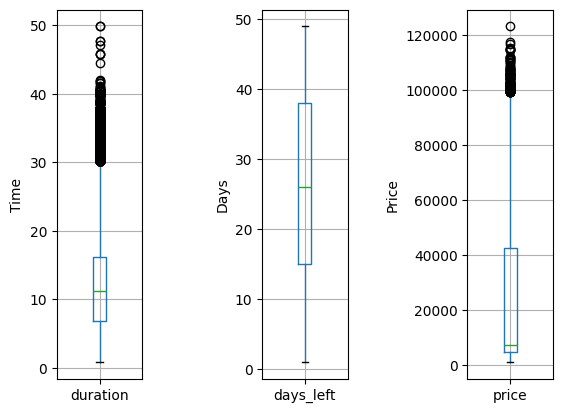

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.subplot(151) # subplot이 위치할 행, 열, 순서를 의미한다.
df[['duration']].boxplot()
plt.ylabel('Time')

plt.subplot(153)
df[['days_left']].boxplot()
plt.ylabel('Days')

plt.subplot(155)
df[['price']].boxplot()
plt.ylabel('Price')

plt.show()


## 4 이상치 처리하기
* 삭제하기 : 데이터의 손실을 감안해야 한다.
* 대체하기 : 데이터의 통계량이 변경되는 것을 고려해야 한다.

In [ ]:
df_origin = df.copy()

### 1) 이상치 데이터 삭제하기

In [ ]:
outlier = df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96].index
outlier

Index([206691, 206692, 206693, 206694, 206695, 206696, 206697, 206698, 206699,
       206784,
       ...
       300107, 300108, 300109, 300110, 300147, 300148, 300149, 300150, 300151,
       300152],
      dtype='int64', length=12493)

In [ ]:
clean_df = df.drop(outlier)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287660 entries, 0 to 300146
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           287660 non-null  object 
 1   flight            287660 non-null  object 
 2   source_city       287660 non-null  object 
 3   departure_time    287660 non-null  object 
 4   stops             287660 non-null  object 
 5   arrival_time      287660 non-null  object 
 6   destination_city  287660 non-null  object 
 7   class             287660 non-null  object 
 8   duration          287660 non-null  float64
 9   days_left         287660 non-null  int64  
 10  price             287660 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.3+ MB


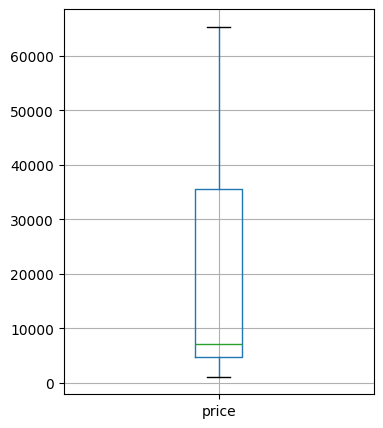

In [ ]:
plt.figure(figsize=(4,5))

clean_df[['price']].boxplot()

plt.show()

### 2) 이상치 데이터 대체하기
IQR 하단에 있는 이상치는 최솟값으로, 상단에 있는 이상치는 최댓값으로 대체하는 함수를 만들어보자.

In [ ]:
df['price'] > 100

,price
0,True
1,True
2,True
3,True
4,True
...,...
300148,True
300149,True
300150,True
300151,True


In [ ]:
def changeOutliers(x, column):
  q1 = x[column].quantile(0.25)
  q3 = x[column].quantile(0.75)

  iqr = q3 - q1

  min = q1 - 1.5*iqr
  max = q3 + 1.5*iqr

  x.loc[(x[column] > max), column] = max
  x.loc[(x[column] < min), column] = min

  return x

clean_df = changeOutliers(df, 'price')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
print('price IQR Outliers : ', findOutliers(clean_df, 'price'))

price IQR Outliers :  0


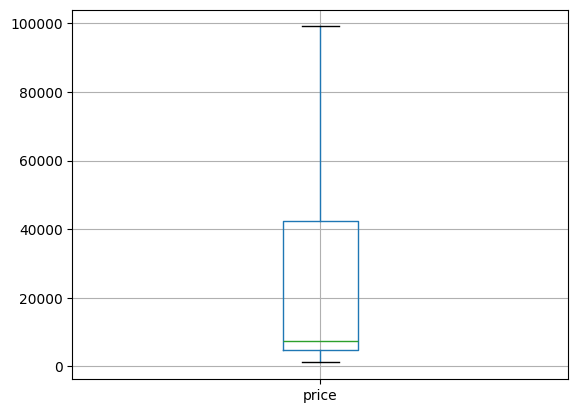

In [ ]:
plt.figure()

clean_df[['price']].boxplot()

plt.show()

## 5 구간화하기
* 구간화 : 연속형 데이터를 구간을 나누어 범주형 또는 순위형으로 변환하는 방법
* 동일 길이(cut)로 구간화 or 동일 개수(qcut)로 구간화할 수 있다.


### 1) 동일 길이로 구간화하기 : pd.cut()

In [ ]:
# duration을 0~5, 5~10, 10~ 3개의 구간으로 나누어 distance 칼럼 생성하기
df['distance'] = pd.cut(df['duration'], bins=[0,5,10,df['duration'].max()], labels=['short', 'medium', 'long'])

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short


In [ ]:
df['distance'].value_counts()

,count
distance,
long,169879
medium,84761
short,45513


### 2) 동일 개수로 구간화하기 : pd.qcut()

In [ ]:
# 항공권 가격을 동일한 개수를 갖는 4개 구간으로 나누기
df['price_rate'] = pd.qcut(df['price'], 4, labels=['cheap', 'normal', 'expensive', 'too expensive'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance,price_rate
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short,normal
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short,normal
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short,normal
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short,normal
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short,normal


In [ ]:
df['price_rate'].value_counts() # 모든 구간의 count 값이 같아야 하지만, 중복되는 데이터가 존재하면 완전히 같을 수 없다.

,count
price_rate,
expensive,75584
normal,75117
cheap,75073
too expensive,74379


# Section 02 범주형 데이터 정제하기
* 범주형 데이터를 컴퓨터가 이해할 수 있도록 수치형 데이터로 변경해야 한다.
* 예를 들면 남자, 여자 구분을 (남, 여)에서 (0, 1)로 바꿔야 한다.
* 이 과정을 **범주형 인코딩(Categorical Encoding)**이라고 한다.

In [2]:
df_origin = df.copy()

## 1 레이블 인코딩하기
* 레이블 인코딩은 범주형 데이터에 숫자 레이블을 할당한다.
* 범주를 알파벳순으로 정렬하고, 0부터 번호를 매기는 방식으로 숫자 레이블을 할당한다.

### 1) 판다스에서 레이블 인코딩하기
pd.factorize()는 알파벳순이 아닌 새로운 범주가 등장하는 순서를 기반으로 숫자를 매핑해 준다.

In [13]:
df = df_origin.copy()

labels, unique = pd.factorize(df['airline'])

print(labels)
print(unique)
print(labels.shape)
print(unique.shape)

[0 0 1 ... 2 2 2]
Index(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India'], dtype='object')
(300153,)
(6,)


In [14]:
print(labels.reshape(-1, 1).shape) # 1차원 ndarray를 2차원 ndarray로 reshape
df['label_encoding'] = labels.reshape(-1, 1)
df.head()

(300153, 1)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2


In [ ]:
# 한줄로 다음과 같이 정리할 수 있다.
df['label_encoding'] = pd.factorize(df['airline'])[0].reshape(-1,1)

In [15]:
# 두 빈도표를 비교해보자.
print(df['airline'].value_counts())
print(df['label_encoding'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
label_encoding
2    127859
5     80892
4     43120
3     23173
1     16098
0      9011
Name: count, dtype: int64


알파벳순이 아니라, 범주가 등장하는 순서로 번호가 매겨짐을 알 수 있다.

### 2) 사이킷런으로 레이블 인코딩하기
* 사이킷런(sckit-learn)은 머신러닝 분석에 사용되는 라이브러리이다.
* sklearn.preprocessing의 LabelEncoder 모듈이 레이블 인코딩에 사용된다.

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['airline_Label_Encoder'] = le.fit_transform(df['airline']) # 알파벳순으로 레이블 번호를 매긴다.
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,5
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,5


In [18]:
# 알파벳순으로 레이블 번호가 매겨진 모습을 확인할 수 있다.
print(df['airline'].value_counts())
print(df['airline_Label_Encoder'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
airline_Label_Encoder
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: count, dtype: int64


In [20]:
# 인코딩된 레이블을 디코딩(역변환)하기
le.inverse_transform(df['airline_Label_Encoder']).reshape(-1,1)

array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Vistara']], dtype=object)

## 2 원핫 인코딩하기
* 순서가 없는 범주형 데이터를 수치형 데이터로 인코딩하는 과정에서 의도하지 않았는데도 알파벳 순으로 순번이 생성되고, 이러한 숫자 정보가 모델에 잘못 반영될 수 있다.
* 원핫 인코딩은 각 범주를 숫자 레이블로 인코딩하는 것이 아니라, **이진 벡터**로 표현한다.

### 1) 판다스에서 원핫 인코딩하기

In [24]:
df = df_origin.copy()

pd.get_dummies(df['class'])

,Business,Economy
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
300148,True,False
300149,True,False
300150,True,False
300151,True,False


In [22]:
df = pd.get_dummies(df, columns=['class']) # columns는 지정한 칼럼만 원핫 인코딩한다.
# class 칼럼이 사라지고, class_Business와 class_Economy 칼럼이 추가된다.
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,False,True
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,False,True
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,False,True
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,False,True
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,False,True


### 2) 사이킷런으로 원핫 인코딩하기

In [33]:
df = df_origin.copy()

from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray()
df_OneHot = pd.DataFrame(encoder,
                         columns=['class_' + str(oh.categories_[0][i]) for i in range(len(oh.categories_[0]))])

df1 = pd.concat([df, df_OneHot], axis=1)
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,1.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,1.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0.0,1.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,1.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,1.0


In [37]:
print(oh.categories_[0]) # OneHotEncoder에 여러 범주를 넣으면, oh.categories_는 "범주마다 고유값 배열"을 원소로 가지는 리스트가 된다.

['Business' 'Economy']


In [32]:
encoder = OneHotEncoder(sparse_output=False)   # (1) sparse_output=False로 바로 ndarray 반환
onehot = encoder.fit_transform(df[['class']]) # (2) DataFrame 그대로 넣어도 됨
onehot_df = pd.DataFrame(onehot,
                         columns=encoder.get_feature_names_out(['class'])) # (3) 자동으로 컬럼명 생성
onehot_df

,class_Business,class_Economy
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
300148,1.0,0.0
300149,1.0,0.0
300150,1.0,0.0
300151,1.0,0.0


# Section 03 스케일링하기
* 칼럼의 범위에 따라 칼럼이 미치는 영향이 달라진다.
* 칼럼 A가 0 ~ 1000, 칼럼 B가 0 ~ 10일 경우 상대적으로 큰 숫자를 갖는 A의 영향이 크게 반영된다.
* 따라서 수치형 데이터의 경우 **칼럼 간 상대적 크기 차이를 제거**할 필요가 있는데, 이를 **스케일링(scaling)**이라고 한다.

## 1 정규화하기
* min-max Scaling은 데이터의 범위를 0~1 사이로 변환하는 가장 일반적인 정규화 방법이다.
* min-max Scaling은 극단적인 이상치에 민감하기 때문에, 이상치를 처리한 뒤 정규화를 해야 한다.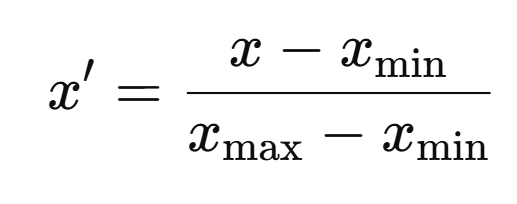
* x = 원래 값
* x′= 스케일링된 값
* x_min = 데이터의 최소값
* x_max = 데이터의 최대값

In [38]:
# 수치형 칼럼에 대해서만 실습을 진행한다.
df = df_origin.copy()

df_num = df[['duration', 'days_left', 'price']]

df_num = (df_num - df_num.min())/(df_num.max()-df_num.min())
df_num.head()

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765


In [39]:
df_num.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,0.232470,0.520932,0.162215
std,0.146775,0.282521,0.186099
min,0.000000,0.000000,0.000000
25%,0.122449,0.291667,0.030156
50%,0.212653,0.520833,0.051818
75%,0.313061,0.770833,0.339570
max,1.000000,1.000000,1.000000


## 2 표준화하기
* 데이터 표준화는 수치형 데이터를 평균이 0이고 표준편차가 1인 표준 정규분포를 갖도록 각 값을 변환하는 방법이다.
* **Z-score 표준화**라고 부른다.

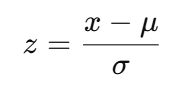
* x = 원래 값
* μ = 전체 데이터의 평균
* σ = 전체 데이터의 표준편차
* z = 표준화된 값

In [40]:
df_num = df[['duration', 'days_left', 'price']]

df_num = (df_num - df_num.mean())/df_num.std()
df_num.head()

,duration,days_left,price
0,-1.397528,-1.843872,-0.658067
1,-1.375282,-1.843872,-0.658067
2,-1.397528,-1.843872,-0.657935
3,-1.386405,-1.843872,-0.657979
4,-1.375282,-1.843872,-0.657979


In [41]:
df_num.describe() # 평균이 0이 아닌 값으로 나타나는 이유는 부동소수점 오차 때문이다.

,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,9.090311e-17,1.810487e-16,-1.939266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


# Section 04 변수 선택하기

## 1 신규 변수 생성하기


### 1) 하나의 데이터로 여러 개의 새로운 칼럼 만들기
* flight 칼럼을 제조사와 모델명으로 분리해서 2개의 새로운 칼럼을 만들어보자.
* apply와 lamda를 사용한다.

In [42]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [45]:
def split_flight(flight):
  arr = flight.split('-')
  manufacture = arr[0]
  model = arr[1]
  return manufacture, model

# zip(*)은 튜플 리스트를 열 단위로 분리해서 두 시리즈로 나눈다.
df['manufacture'], df['model'] = zip(*df['flight'].apply(lambda x : split_flight(x)))
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963


In [46]:
df['flight'].apply(lambda x : split_flight(x))

,flight
0,"(SG, 8709)"
1,"(SG, 8157)"
2,"(I5, 764)"
3,"(UK, 995)"
4,"(UK, 963)"
...,...
300148,"(UK, 822)"
300149,"(UK, 826)"
300150,"(UK, 832)"
300151,"(UK, 828)"


### 2) 여러 개의 데이터로 하나의 새로운 칼럼 만들기
* 출발 도시와 도착 도시를 이용해 새로운 칼럼 'route'를 만들어보자.
* apply와 lambda를 사용한다.

In [47]:
df['route'] = df.apply(lambda x : (x['source_city'], x['destination_city']), axis=1) # axis=1 : 행 단위 적용
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963,"(Delhi, Mumbai)"


In [48]:
df.drop(['manufacture', 'model'], axis=1).head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,"(Delhi, Mumbai)"


## 2 변수 선택하기
* 변수 선택은 사용가능한 변수 중 모델 훈련에 효과적인 특성의 부분집합을 선택하여 모델을 구축하는 과정이다.
* 학습에 사용하는 특징의 수를 줄이면서, 모델의 예측 능력은 유지하는 것이 목적이다.
1. RFE(Recursive Feature Elimination)
  * 머신러닝에서 사용되고, 원하는 변수의 수에 도달할 때까지 가장 중요하지 않은 변수를 재귀적으로 제거하는 방법이다.
2. RFE-CV(Recursive Feature Elimination with Cross Validation)
3. UFS(Univariate Feature Selecion)